In [1]:
from sklearn.cluster import KMeans
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("./123.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

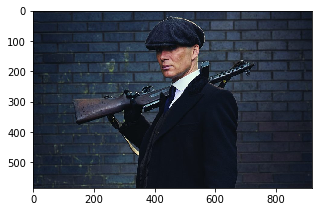

(584, 920, 3)


In [3]:
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()
print (img.shape)

In [4]:
c_img = img.copy()
c_img = np.reshape(c_img, (-1,3))
c_img1 = img.copy()
c_img1 = np.reshape(c_img1, (-1,3))
c_img2 = img.copy()
c_img2 = np.reshape(c_img2, (-1,3))

print (c_img.shape)

(537280, 3)


In [5]:
kmeans = KMeans(n_clusters=7,random_state=2)
kmeans1 = KMeans(n_clusters=5,random_state=2)
kmeans2 = KMeans(n_clusters=3,random_state=2)

In [6]:
kmeans.fit_predict(c_img)
kmeans1.fit_predict(c_img1)
kmeans2.fit_predict(c_img2)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [7]:
centers = kmeans.cluster_centers_.astype(int)
centers1 = kmeans1.cluster_centers_.astype(int)
centers2= kmeans2.cluster_centers_.astype(int)

print (centers)
print (centers1)
print (centers2)

[[173 137 125]
 [ 27  33  46]
 [ 37  46  61]
 [ 49  61  78]
 [214 226 227]
 [ 14  18  27]
 [ 70  81  96]]
[[ 33  41  56]
 [167 134 124]
 [ 56  68  84]
 [213 225 226]
 [ 16  20  30]]
[[ 22  28  39]
 [ 49  60  76]
 [184 162 155]]


In [8]:
per = np.array(np.unique(kmeans.labels_, return_counts=True)[1], dtype=np.float32)
per = per/c_img.shape[0]

print(per)
per1 = np.array(np.unique(kmeans1.labels_, return_counts=True)[1], dtype=np.float32)
per1 = per1/c_img1.shape[0]

print(per1)
per2 = np.array(np.unique(kmeans2.labels_, return_counts=True)[1], dtype=np.float32)
per2 = per2/c_img2.shape[0]

print(per2)

[0.01853968 0.26864391 0.22732095 0.15812426 0.00732021 0.2492462
 0.07080479]
[0.42658763 0.02027807 0.21721263 0.00748585 0.32843582]
[0.59087813 0.38318381 0.02593806]


In [9]:
dom = [ [per[ix], centers[ix]] for ix in range(kmeans.n_clusters) ]
#print (dom)
DOM = sorted(dom, reverse=True)

print (DOM)

[[0.2686439100655152, array([27, 33, 46])], [0.2492462030970816, array([14, 18, 27])], [0.22732094997022037, array([37, 46, 61])], [0.15812425550923168, array([49, 61, 78])], [0.07080479452054794, array([70, 81, 96])], [0.01853968135795116, array([173, 137, 125])], [0.007320205479452055, array([214, 226, 227])]]


In [10]:
dom1 = [ [per1[ix], centers1[ix]] for ix in range(kmeans1.n_clusters) ]
#print (dom)
DOM1 = sorted(dom1, reverse=True)

print (DOM1)

[[0.42658762656343063, array([33, 41, 56])], [0.3284358248957713, array([16, 20, 30])], [0.2172126265634306, array([56, 68, 84])], [0.020278067301965456, array([167, 134, 124])], [0.007485854675402025, array([213, 225, 226])]]


In [11]:
dom2 = [ [per2[ix], centers2[ix]] for ix in range(kmeans2.n_clusters) ]
#print (dom)
DOM2 = sorted(dom2, reverse=True)

print (DOM2)

[[0.5908781268612269, array([22, 28, 39])], [0.38318381477069685, array([49, 60, 76])], [0.025938058368076236, array([184, 162, 155])]]


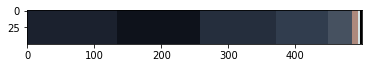

In [12]:
color_p = np.zeros((50,500,3)).astype(int)

start = 0
for ix in range(kmeans.n_clusters):
    width = int( (DOM[ix][0])*color_p.shape[1] )
    
    end = start+width
    color_p[:,start:end, :] = DOM[ix][1]
    start = end
    
plt.imshow(color_p)
plt.show()

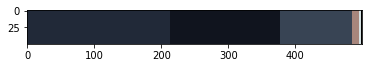

In [13]:
color_p1 = np.zeros((50,500,3)).astype(int)

start = 0
for ix in range(kmeans1.n_clusters):
    width = int( (DOM1[ix][0])*color_p1.shape[1] )
    
    end = start+width
    color_p1[:,start:end, :] = DOM1[ix][1]
    start = end
    
plt.imshow(color_p1)
plt.show()

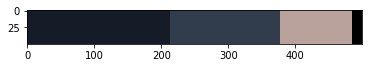

In [14]:
color_p2 = np.zeros((50,500,3)).astype(int)

start = 0
for ix in range(kmeans2.n_clusters):
    width = int( (DOM1[ix][0])*color_p2.shape[1] )
    
    end = start+width
    color_p2[:,start:end, :] = DOM2[ix][1]
    start = end
    
plt.imshow(color_p2)
plt.show()

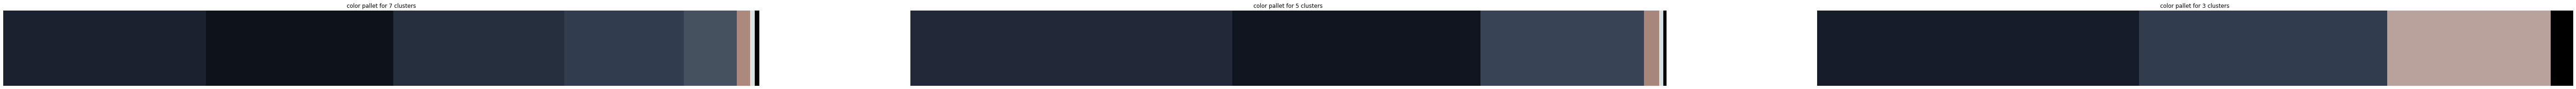

In [24]:
fig1=plt.figure(figsize=(100,20))
plt.subplot(1,3,1)
plt.axis("off")
plt.title("color pallet for 7 clusters")
plt.imshow(color_p)
plt.subplot(1,3,2)
plt.axis("off")
plt.title("color pallet for 5 clusters")

plt.imshow(color_p1)
plt.subplot(1,3,3)
plt.axis("off")
plt.title("color pallet for 3 clusters")
plt.imshow(color_p2)
fig1.savefig("colorpallet.png")



In [16]:
for ix in range(c_img.shape[0]):
    c_img[ix] = centers[kmeans.labels_[ix]]
    
c_img = np.reshape(c_img, (img.shape[0], img.shape[1], 3))

In [17]:
for ix in range(c_img1.shape[0]):
    c_img1[ix] = centers1[kmeans1.labels_[ix]]
    
c_img1 = np.reshape(c_img1, (img.shape[0], img.shape[1], 3))

In [18]:
for ix in range(c_img2.shape[0]):
    c_img2[ix] = centers2[kmeans2.labels_[ix]]
    
c_img2 = np.reshape(c_img2, (img.shape[0], img.shape[1], 3))

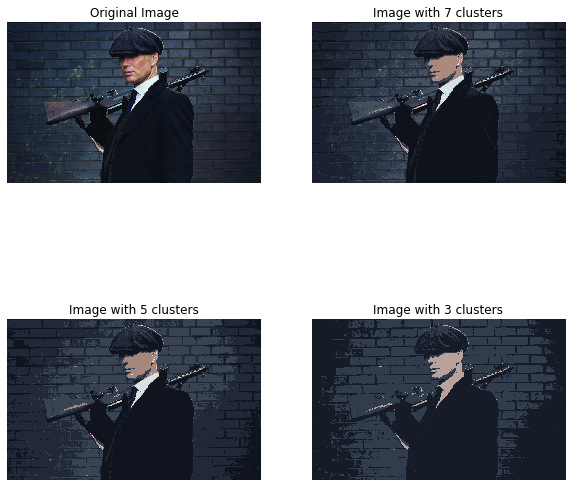

In [21]:
fig=plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.axis("off")
plt.imshow(img)
plt.title("Original Image")

plt.subplot(2,2,2)
plt.axis("off")
plt.imshow(c_img)
plt.title("Image with 7 clusters")

plt.subplot(2,2,3)
plt.axis("off")
plt.imshow(c_img1)
plt.title("Image with 5 clusters")

plt.subplot(2,2,4)
plt.axis("off")
plt.imshow(c_img2)
plt.title("Image with 3 clusters")
fig.savefig('full_figure.png')

plt.show()